# Demonstration of Possible Compression for 2D Temporally Decaying Jets
This notebook compares naive arrays of certain states of temporally decaying jets with a compressed MPS represantation in terms of memory size and fidelity of the MPS. The intermediate states are taken from a DNS of TDJ with Reynolds Number of $10^5$.

In [ ]:
from utils.temporally_decaying_jets import initial_fields
import matplotlib.pyplot as plt

plt.rcParams["text.usetex"] = True
import numpy as np
from utils.scale_ordering import *
from utils.jax_ops import *

# Initial Values
Set up initial values for temporally decaying jets in 2D on a $2^10$ by $2^10$ grid.

In [2]:
n = 10
N = 2**n


velocities = initial_fields(n=n)

Plot components of the initial Values.

In [ ]:
def plot(A, B, title_a, title_b):
    extent = (0, 1, 0, 1)
    fig, axarr = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    true = axarr[0].imshow(
        A.T,
        extent=extent,
        origin="lower",
    )
    axarr[0].set_title(title_a)
    plt.colorbar(true, ax=axarr[0])

    mps = axarr[1].imshow(
        B.T,
        extent=extent,
        origin="lower",
    )
    axarr[1].set_title(title_b)
    plt.colorbar(mps, ax=axarr[1])

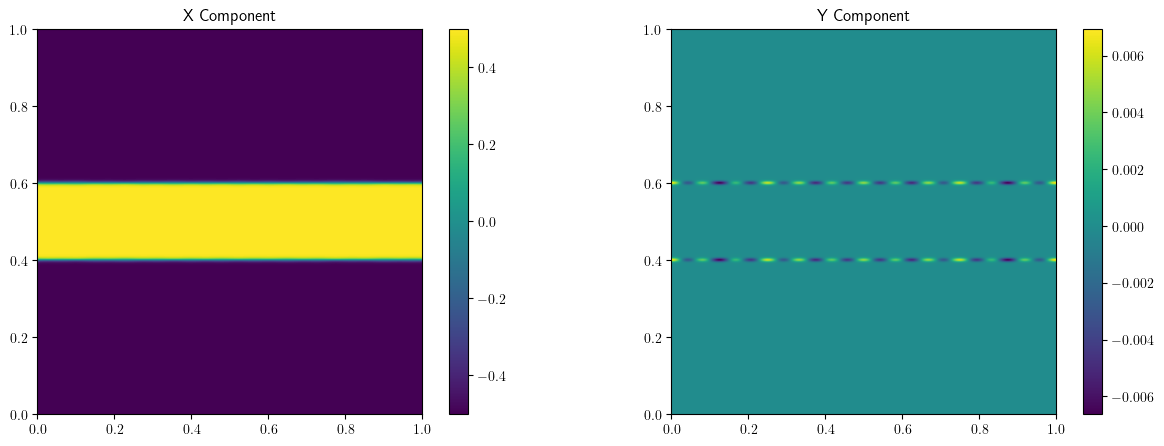

In [4]:
plot(velocities[0], velocities[1], "X Component", "Y Component")

For simplicity, we look at the velocities absolute values

In [ ]:
U = np.sqrt(
    velocities[0] ** 2 + velocities[1] ** 2
)  # absolute values of the velocity field

In [ ]:
U_reshaped = U.reshape((2,) * (2 * n))

permutation = []
for i in range(n):
    permutation.append(i)
    permutation.append(n + i)
print(permutation)

U_transposed = U_reshaped.transpose(permutation)
U_transposed_reshaped = U_transposed.reshape((4,) * n)

[0, 10, 1, 11, 2, 12, 3, 13, 4, 14, 5, 15, 6, 16, 7, 17, 8, 18, 9, 19]


We decompose $U$ into an MPS with maximum bond dimension chi_max

In [ ]:
chi_max = 8  # = 64 def maximum bond dimension
MPS_U = MPS(U_transposed_reshaped, max_bond=chi_max)  # decompose and compress

## Comparing Initial Array and MPS Represantation

As a measure of compression we look at the quotient of the respective entries and as a measure of fidelity, we look at the relative RMSE.

In [8]:
def show_measures(uncompressed, compressed):
    print("Bond Dimensions:")
    print(bond_dims_of_MPS(compressed))
    print()
    print()

    N_params_full = uncompressed.size
    N_params_mps = sum([core.size for core in compressed])
    print("overal performance measures:")
    print("         number of parameters full tensor: ", N_params_full)
    print("number of parameters matrix product state: ", N_params_mps)

    compression = N_params_mps / N_params_full
    compression = np.round(compression * 100, 1)
    mps_data = transform_tensor(contract_MPS(compressed))
    mean = np.sum(np.abs(uncompressed).mean()) / uncompressed.ndim
    RMSE = np.sqrt(((uncompressed - mps_data) ** 2).mean()) / uncompressed.ndim
    relative = np.round(RMSE / mean * 100, 1)
    print("           relative size of MPS (rounded): ", compression, "%")
    print("            mean relative error (rounded): ", relative, "%")
    print()
    print()

    print("visual comparison")
    plot(uncompressed, mps_data, "baseline", "MPS")

### Initial Values

Bond Dimensions:
(1, 4, 8, 8, 8, 8, 8, 8, 8, 4, 1)


overal performance measures:
         number of parameters full tensor:  1048576
number of parameters matrix product state:  1824
           relative size of MPS (rounded):  0.2 %
            mean relative error (rounded):  0.1 %


visual comparison


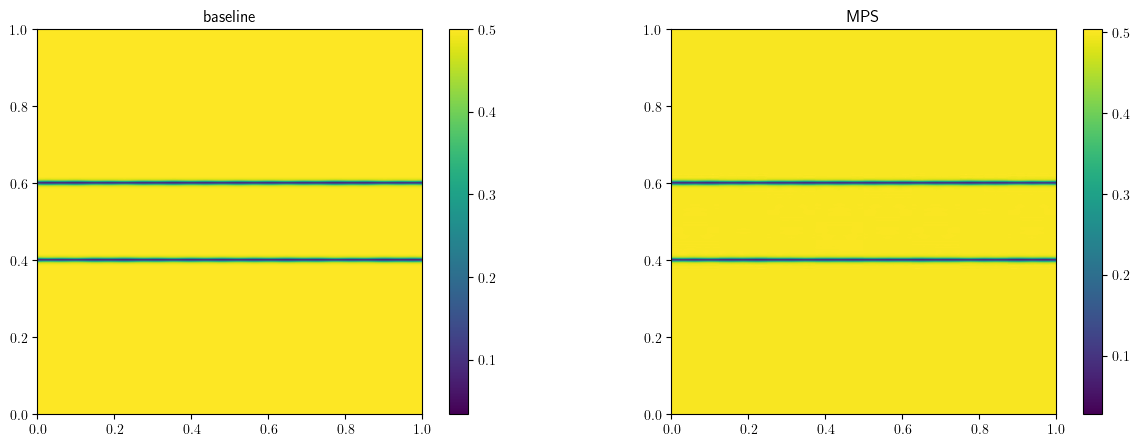

In [9]:
show_measures(U, MPS_U)

### T=1

Bond Dimensions:
(1, 4, 8, 8, 8, 8, 8, 8, 8, 4, 1)


overal performance measures:
         number of parameters full tensor:  1048576
number of parameters matrix product state:  1824
           relative size of MPS (rounded):  0.2 %
            mean relative error (rounded):  6.8 %


visual comparison


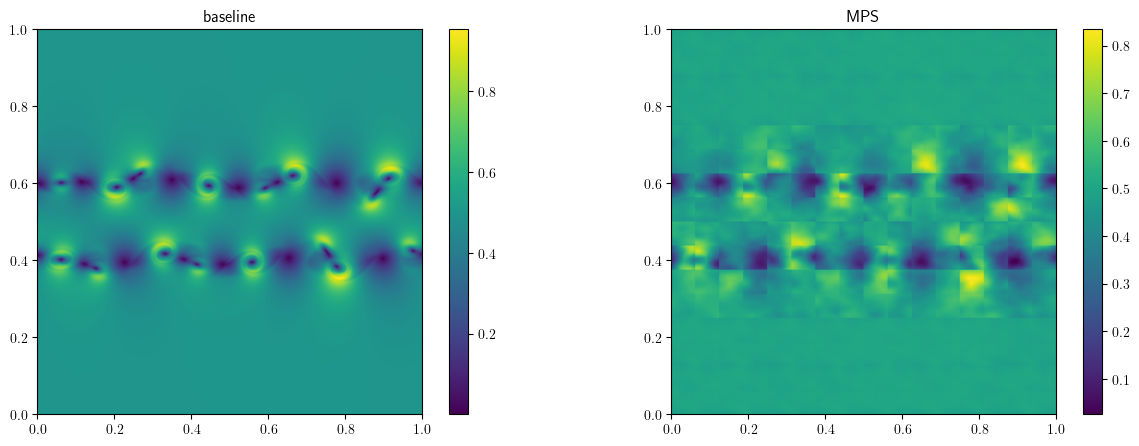

In [ ]:
import pickle

file = open(f"examples/T_1.pkl", "rb")
U = pickle.load(file)
file.close()
MPS_U = MPS(transform_tensor(U), max_bond=chi_max)
show_measures(U, MPS_U)

### T=2

Bond Dimensions:
(1, 4, 8, 8, 8, 8, 8, 8, 8, 4, 1)


overal performance measures:
         number of parameters full tensor:  1048576
number of parameters matrix product state:  1824
           relative size of MPS (rounded):  0.2 %
            mean relative error (rounded):  6.3 %


visual comparison


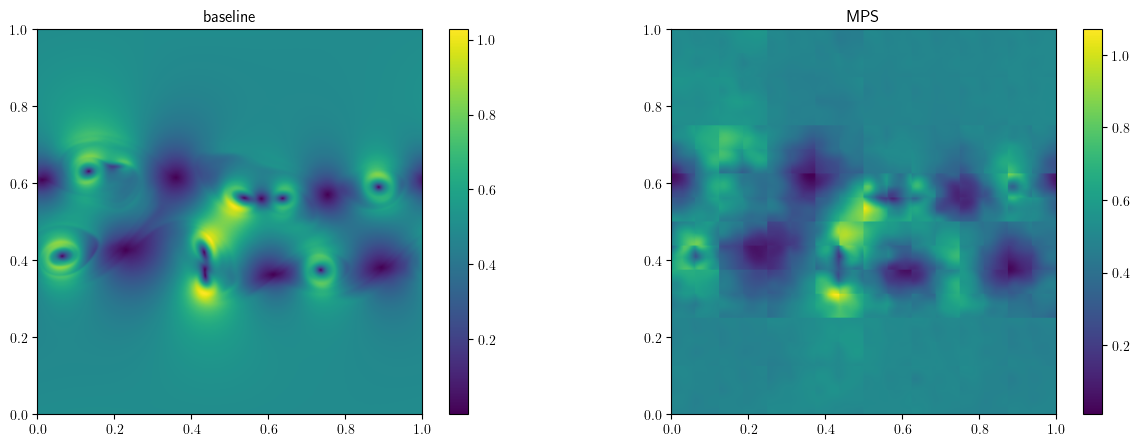

In [11]:
file = open(f"examples/T_2.pkl", "rb")
U = pickle.load(file)
file.close()
MPS_U = MPS(transform_tensor(U), max_bond=chi_max)
show_measures(U, MPS_U)